Image processing techniques take advantage of mathematical operations   
What's coverind in this notebook:   
1-Arithmetic Operations like addition and multiplication    
2-Thresholding and Masking  
3-Bitwise operations like OR,AND,XOR

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)
    
    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path) 

### Original Image

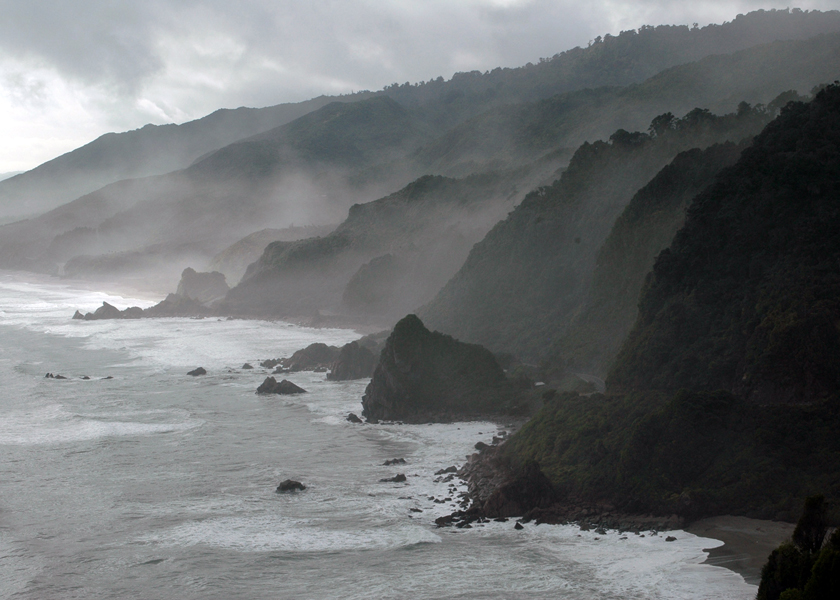

In [4]:
img_bgr=cv2.imread("New_Zealand_Coast.jpg",cv2.IMREAD_COLOR)
img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

Image(filename="New_Zealand_Coast.jpg")

### Addition or Brightness  
Addition of images results in increasing or decreasing the brightness of the image since we are eventually increasing or decreasing the intensity values of each pixel by the same amount. So, this will result in global increase/decrease in brightness

Text(0.5, 1.0, 'Lighter')

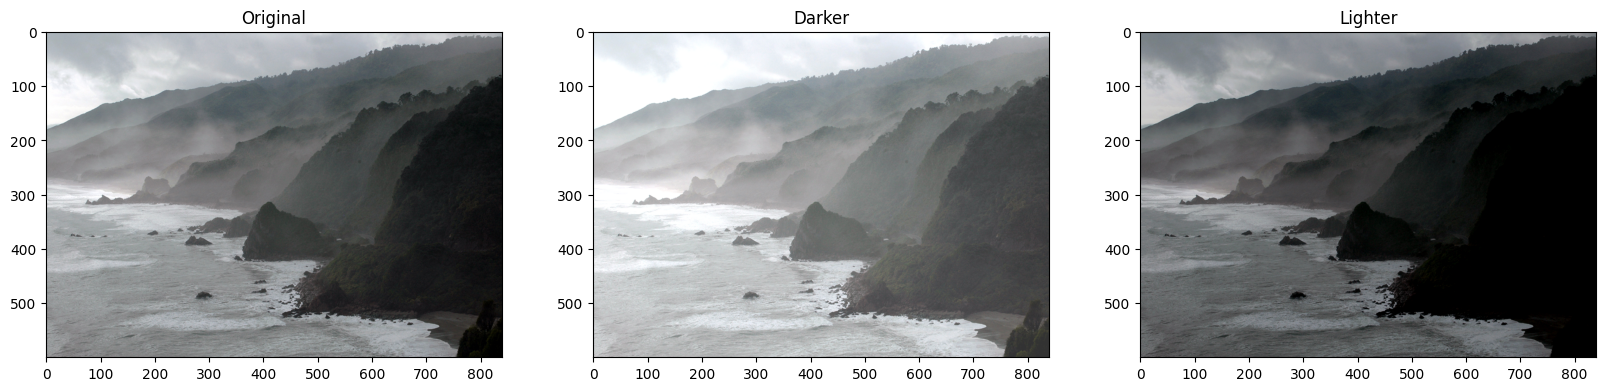

In [6]:
matrix=np.ones(img_rgb.shape,dtype='uint8')*50
img_rgb_darker=cv2.add(img_rgb,matrix)
img_rgb_lighter=cv2.subtract(img_rgb,matrix)

plt.figure(figsize=[20,5])

plt.subplot(131)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(132)
plt.imshow(img_rgb_darker)
plt.title("Darker")

plt.subplot(133)
plt.imshow(img_rgb_lighter)
plt.title("Lighter")

### Multiplication or Contrast  
Contrast is the difference in the intensity values of the pixels of an image. Multiplying the intensity values with a constant can make the difference larger(if the multiplying factor>1) and smaller(if the multiplying factor<1)

Text(0.5, 1.0, 'Lower Contrast')

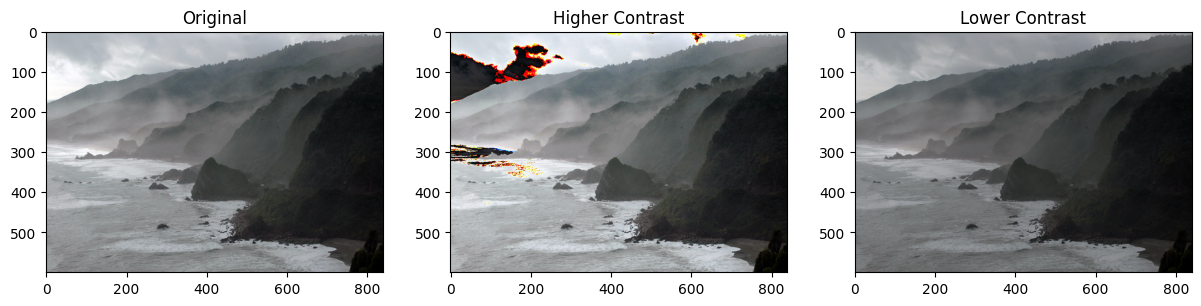

In [12]:
matrix1=np.ones(img_rgb.shape)*0.8
matrix2=np.ones(img_rgb.shape)*1.2

img_rgb_lower=np.uint8(cv2.multiply(np.float64(img_rgb),matrix1))
img_rgb_higher=np.uint8(cv2.multiply(np.float64(img_rgb),matrix2))

plt.figure(figsize=[20,5])

plt.subplot(141)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(142)
plt.imshow(img_rgb_higher)
plt.title("Higher Contrast")

plt.subplot(143)
plt.imshow(img_rgb_lower)
plt.title("Lower Contrast")

####    What happened?  
The weird colors in some areas of the image occur becaus after multiplying, the values that are already high end up becoming greater than 255. Thus, the overflow issue

### Handling overflow using np.clip

Text(0.5, 1.0, 'Higher Contrast')

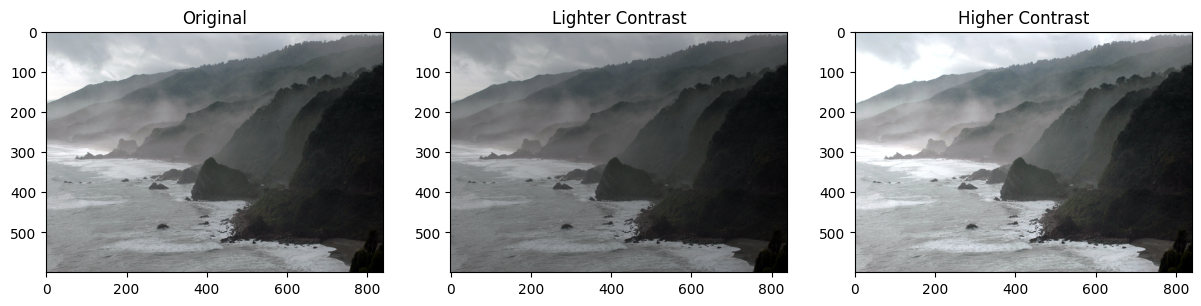

In [14]:
matrix1=np.ones(img_rgb.shape)*0.8
matrix2=np.ones(img_rgb.shape)*1.2

img_rgb_lower=np.uint8(cv2.multiply(np.float64(img_rgb),matrix1))
img_rgb_higher=np.uint8(np.clip(cv2.multiply(np.float64(img_rgb),matrix2),0,255))

plt.figure(figsize=[20,5])

plt.subplot(141)
plt.imshow(img_rgb)
plt.title("Original")

plt.subplot(142)
plt.imshow(img_rgb_lower)
plt.title("Lighter Contrast")

plt.subplot(143)
plt.imshow(img_rgb_higher)
plt.title("Higher Contrast")

### Image Thresholding  
Binary images have a lot of use cases in Image Processing. One of the most common use cases is that of creating masks. Image Masks allow us to process on specific parts of an image keeping the other parts intact. Image Thresholding is used to create Binary Images from greyscale images. Different thresholds can be used to create different binary images from the same orignal image.  

cv2.threshold(src, thresh, maxval, type, dst)   

The 4 required arguments include:   
1-src:input-array(multiple-channel 8-bit or 32-bit floating point)  
2-thresh:threshold value    
3-maxval:maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types   
4-type:thresholding type    

cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blocksize, C, dst)  

The 6 required arguments in this function are:  
1-src:Source of 8-bit single channel image  
2-maxValue:Non-zero value assigned to the pixels for which the condition is satisfied   
3-adaptiveMethod:Adaptive thresholding algorithim to use. The BORDER_REPLICATE | BORDER_ISOLATED is used to process boudaries.  
4-thresholdType: Thresholding type that must be either THRESH_BINARY or THRESH_BINARY_INV   
5-blockSize:Size of a pixel neighbourhood that is used to calculate threshold value for the pixel: 3, 5, 7 and so on    
6-C:Constant subtracted from the mean or weighted mean. Normally, it's positive but it might be negative or zero as well

Shape of original Image:  (572, 800)
Shape of thresholded image:  (572, 800)


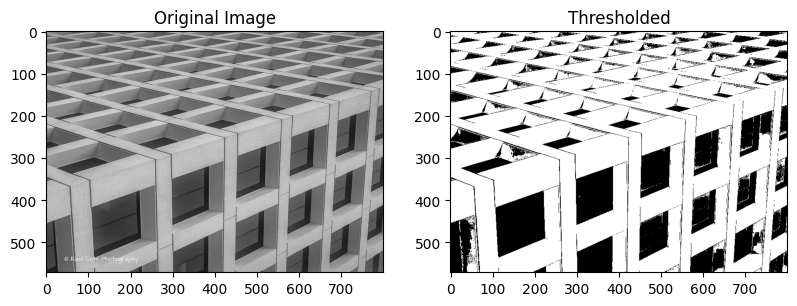

In [20]:
img_read=cv2.imread("building-windows.jpg",cv2.IMREAD_GRAYSCALE)
retval, img_thresh=cv2.threshold(img_read,100,255,cv2.THRESH_BINARY)

plt.figure(figsize=[20,5])

plt.subplot(141)
plt.imshow(img_read,cmap="gray")
plt.title("Original Image")

plt.subplot(142)
plt.imshow(img_thresh,cmap="gray")
plt.title("Thresholded")


print("Shape of original Image: ",img_read.shape)
print("Shape of thresholded image: ",img_thresh.shape)